<a href="https://colab.research.google.com/github/braldanago/BankLoanBigData/blob/master/BankLoanBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto : Préstamo bancario**
Universidad Distrital Francisco José de Caldas
---
 
Integrantes


*   Brayan Steven Aldana Gómez
*   David Ricardo Cortés Leal


**Enmarcar la preocupacion.**

*   **Interesado:** Entidad Bancaria
*   **Preocupación:** ¿Cómo aprobar prestamos bancarios acertadamente para reducir el riesgo del no pago de la deuda?
*   **¿Por qué?:** Porque existe incertidumbre al analizar el perfil de un cliente para la aprobación de prestamos.
*   **¿Qué?:** Prestamos bancarios
*   **¿Para qué?:** Para evitar complicaciones economicas al aprobar prestamos a clientes que no cumplirán con el pago de la misma.

**Objetivo de análisis**

Aprobar o no préstamos bancarios a clientes.

Preguntas


> Descriptivas
*   ¿Cual es el genero al cual más se le aprueban prestamos?
*   ¿El porcentaje de personas casadas con prestamos aprobados es mayor que las que no?
*   ¿Las personas casadas suelen tener más dependientes que las que no?
*   ¿Qué porcentaje de personas graduadas y no graduadas ha solicitado un prestamo?
*   ¿Qué porcentaje representan las personas que son indepentientes en las solicitudes de prestamo?
*   ¿Cual es el promedio de ingresos de las personas que solicitan el prestamo?
*   ¿Cual es el promedio de ingresos de los codeudores?
*   ¿Cual es el porcentaje de personas que tienen historia crediticia al momento de solicitar el prestamo?
*   ¿Cual es el promedio de dinero solicitado para los prestamos?

> Diagnostica
*   ¿Qué relación tienen los ingresos del solicitante con la cantidad solicitada?
*   ¿Existe alguna relación entre la historia crediticia y la aprobación del préstamo?
*   ¿Hay algún vinculo entre las personas casadas y el número de dependientes de estas?

> Predictiva
*   ¿A que clientes se les debería aprobar el prestamo y a cuales no?


**Dataset**

Tomado del repositorio de [Kaggle](https://www.kaggle.com/ninzaami/loan-predication)

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232422 sha256=97ee190aa1450e0ec9a00fbfda5115eceee23d0541e6fb9acf21fd1b6819b35c
  Stored in directory: /tmp/pip-ephem-wheel-cache-kr8x_dbf/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
pip install -U dataprep

Requirement already up-to-date: dataprep in /usr/local/lib/python3.6/dist-packages (0.2.14)


In [ ]:
pip install pingouin

In [ ]:
#Prueba dataset LOAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns
#from dataprep.eda import plot

#Cargando el dataset
ruta_brayan = '/content/drive/MyDrive/2020-3/Big data/Proyecto Big Data/bank_loan.csv'
ruta_ricardo = '/content/drive/MyDrive/Big Data Drive/Copia de bank_loan.csv'
df= pd.read_csv(ruta_ricardo)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analisis exploratorio de datos. 


In [ ]:
df.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [ ]:
profile = ProfileReport(df, title="Loan Report")
profile

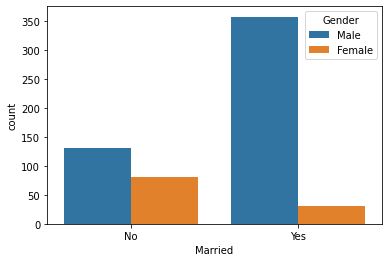

In [ ]:
#Analizando más gráficas
sns.countplot(x='Married', hue='Gender', data=df)

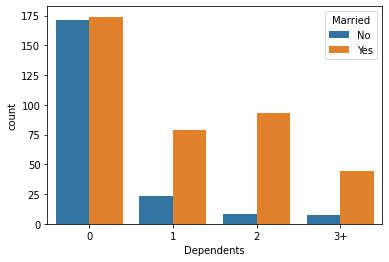

In [ ]:
sns.countplot(x='Dependents', hue='Married', data=df)

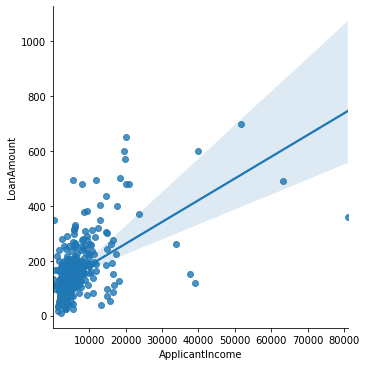

In [ ]:
sns.lmplot(x="ApplicantIncome", y="LoanAmount", data=df)

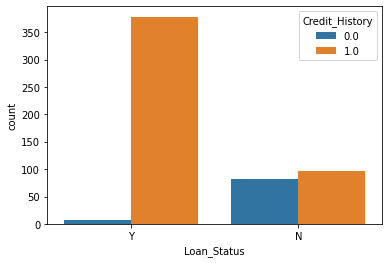

In [ ]:
sns.countplot(x='Loan_Status', hue='Credit_History', data=df)

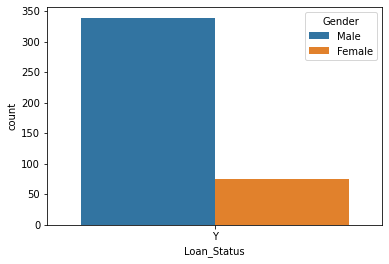

In [ ]:
sns.countplot(x='Loan_Status', hue='Gender', data=df[df['Loan_Status'] == 'Y'])


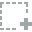
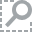
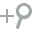
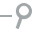
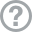
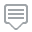
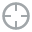
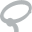
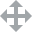
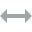
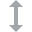
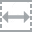
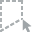
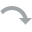
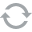
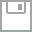
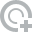
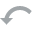
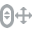
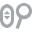
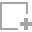
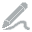
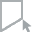
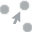
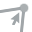

In [ ]:
plot(df[df['Loan_Status'] == 'Y'],"Gender",)

In [ ]:

#CHI SQUARE TEST

#Hipotesis nula: Las variables son independientes
#Hipotesis alternativa: Las variables no son independientes

import pingouin as pin


In [ ]:
stats = pin.chi2_independence(df,x='Gender',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status           N           Y
Gender                             
Female        34.848586   77.151414
Male         152.151414  336.848586
Loan_Status      N      Y
Gender                   
Female        36.5   75.5
Male         150.5  338.5


test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.139626  1.0  0.708653  0.015080  0.066143
1        cressie-read  0.666667  0.139322  1.0  0.708956  0.015064  0.066108
2      log-likelihood  0.000000  0.138725  1.0  0.709551  0.015031  0.066038
3       freeman-tukey -0.500000  0.138287  1.0  0.709990  0.015007  0.065987
4  mod-log-likelihood -1.000000  0.137856  1.0  0.710422  0.014984  0.065937
5              neyman -2.000000  0.137016  1.0  0.711266  0.014938  0.065839

In [ ]:
stats = pin.chi2_independence(df,x='Married',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status           N           Y
Married                            
No            66.932897  146.067103
Yes          125.067103  272.932897
Loan_Status      N      Y
Married                  
No            78.5  134.5
Yes          113.5  284.5


test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.475019  1.0  0.034394  0.085372  0.561794
1        cressie-read  0.666667  4.456036  1.0  0.034778  0.085190  0.560023
2      log-likelihood  0.000000  4.421890  1.0  0.035481  0.084863  0.556826
3       freeman-tukey -0.500000  4.399528  1.0  0.035949  0.084648  0.554723
4  mod-log-likelihood -1.000000  4.379862  1.0  0.036366  0.084459  0.552868
5              neyman -2.000000  4.348338  1.0  0.037045  0.084155  0.549884

In [ ]:
stats = pin.chi2_independence(df,x='Dependents',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status           N           Y
Dependents                         
0            107.128548  237.871452
1             31.672788   70.327212
2             31.362270   69.637730
3+            15.836394   35.163606
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  3.158340  3.0  0.367851  0.071721  0.287923
1        cressie-read  0.666667  3.173784  3.0  0.365599  0.071896  0.289220
2      log-likelihood  0.000000  3.209402  3.0  0.360453  0.072298  0.292212
3       freeman-tukey -0.500000  3.240437  3.0  0.356019  0.072647  0.294819
4  mod-log-likelihood -1.000000  3.275373  3.0  0.351085  0.073038  0.297755
5              neyman -2.000000  3.357736  3.0  0.339687  0.073950  0.304678

In [ ]:
stats = pin.chi2_independence(df,x='Education',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status           N          Y
Education                         
Graduate      150.09772  329.90228
Not Graduate   41.90228   92.09772
Loan_Status       N      Y
Education                 
Graduate      140.5  339.5
Not Graduate   51.5   82.5


test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  4.091490  1.0  0.043100  0.081631  0.525063
1        cressie-read  0.666667  4.054975  1.0  0.044041  0.081266  0.521461
2      log-likelihood  0.000000  3.988097  1.0  0.045823  0.080593  0.514819
3       freeman-tukey -0.500000  3.943061  1.0  0.047065  0.080137  0.510312
4  mod-log-likelihood -1.000000  3.902188  1.0  0.048223  0.079720  0.506198
5              neyman -2.000000  3.832186  1.0  0.050277  0.079002  0.499100

In [ ]:
stats = pin.chi2_independence(df,x='Self_Employed',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status             N           Y
Self_Employed                        
No             157.216495  342.783505
Yes             25.783505   56.216495
Loan_Status        N      Y
Self_Employed              
No             157.5  342.5
Yes             25.5   56.5


test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  0.005293  1.0  0.942004  0.002936  0.050607
1        cressie-read  0.666667  0.005296  1.0  0.941988  0.002937  0.050607
2      log-likelihood  0.000000  0.005302  1.0  0.941956  0.002938  0.050608
3       freeman-tukey -0.500000  0.005306  1.0  0.941931  0.002940  0.050608
4  mod-log-likelihood -1.000000  0.005311  1.0  0.941907  0.002941  0.050609
5              neyman -2.000000  0.005320  1.0  0.941858  0.002943  0.050610

In [ ]:
stats = pin.chi2_independence(df,x='Credit_History',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status              N           Y
Credit_History                        
0.0              28.246454   60.753546
1.0             150.753546  324.246454
Loan_Status        N      Y
Credit_History             
0.0             81.5    7.5
1.0             97.5  377.5


test    lambda        chi2  ...           pval    cramer  power
0             pearson  1.000000  174.637297  ...   7.184760e-40  0.533316    1.0
1        cressie-read  0.666667  168.718033  ...   1.409831e-38  0.524199    1.0
2      log-likelihood  0.000000  171.172203  ...   4.103465e-39  0.527998    1.0
3       freeman-tukey -0.500000  188.601933  ...   6.419551e-43  0.554229    1.0
4  mod-log-likelihood -1.000000  227.102355  ...   2.554393e-51  0.608172    1.0
5              neyman -2.000000  449.521158  ...  9.169062e-100  0.855640    1.0

[6 rows x 7 columns]

In [ ]:
stats = pin.chi2_independence(df,x='Property_Area',y='Loan_Status')
print(stats[0])
print(stats[1])
stats[2]

Loan_Status            N           Y
Property_Area                       
Rural          55.973941  123.026059
Semiurban      72.859935  160.140065
Urban          63.166124  138.833876
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  12.297623  2.0  0.002136  0.141523  0.891113
1        cressie-read  0.666667  12.363615  2.0  0.002067  0.141902  0.892810
2      log-likelihood  0.000000  12.529216  2.0  0.001902  0.142849  0.896965
3       freeman-tukey -0.500000  12.684291  2.0  0.001761  0.143730  0.900726
4  mod-log-likelihood -1.000000  12.867440  2.0  0.001606  0.144764  0.905011
5              neyman -2.000000  13.324896  2.0  0.001278  0.147315  0.915000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preproccesing data

In [ ]:
df.head()

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]

In [ ]:
#Eliminacion e imputacion
df.drop('Loan_ID', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Self_Employed', axis=1, inplace=True)
df.drop('Dependents', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Married
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
#LoanAmount
mean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace=True)
#Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
#Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Property_Area'].unique())

['No' 'Yes']
['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['Married'] = lb.fit_transform(df['Married'])
df['Education'] = lb.fit_transform(df['Education'])
df['Property_Area'] = lb.fit_transform(df['Property_Area'])
df['Loan_Status'] = lb.fit_transform(df['Loan_Status'])

In [ ]:
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

[0 1]
[0 1]
[2 0 1]
[1 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

sinEscalar = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] =  std.fit_transform(sinEscalar)
df.head()

Married  Education  ...  Property_Area  Loan_Status
0        0          0  ...              2            1
1        1          0  ...              0            0
2        1          0  ...              2            1
3        1          1  ...              2            1
4        0          0  ...              2            1

[5 rows x 9 columns]

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

oversampled_trainX, oversampled_trainY = sm.fit_sample(x, y)

oversampled_df = pd.concat([pd.DataFrame(oversampled_trainX), pd.DataFrame(oversampled_trainY)], axis=1)

oversampled_df.columns=df.columns
oversampled_df


Married  Education  ...  Property_Area  Loan_Status
0          0          0  ...              2            1
1          1          0  ...              0            0
2          1          0  ...              2            1
3          1          1  ...              2            1
4          0          0  ...              2            1
..       ...        ...  ...            ...          ...
839        1          0  ...              1            0
840        1          1  ...              0            0
841        1          0  ...              1            0
842        1          1  ...              2            0
843        1          1  ...              0            0

[844 rows x 9 columns]

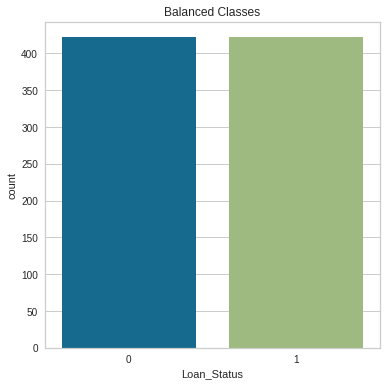

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot('Loan_Status', data=oversampled_df)
plt.title('Balanced Classes')
plt.show()

# Modelos

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.8MB/s 
     |████████████████████████████████| 174kB 30.9MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 1.8MB 26.2MB/s 
     |████████████████████████████████| 157.5MB 85kB/s 
     |████████████████████████████████| 13.9MB 348kB/s 
     |████████████████████████████████| 66.3MB 56kB/s 
     |████████████████████████████████| 276kB 41.0MB/s 
     |████████████████████████████████| 1.6MB 39.4MB/s 
     |████████████████████████████████| 6.8MB 41.3MB/s 
     |████████████████████████████████| 2.1MB 40.8MB/s 
     |████████████████████████████████| 153kB 44.5MB/s 
     |████████████████████████████████| 163kB 50.3MB/s 
     |████████████████████████████████| 337kB 35.1MB/s 
     |████████████████████████████████| 1.1MB 41.3MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 204kB 46.4MB/s

**Configuración del conjunto de datos**

In [ ]:
from pycaret.classification import *
clf1 = setup(data = oversampled_df, target = 'Loan_Status')

Description             Value
0                               session_id               446
1                                   Target       Loan_Status
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data          (844, 9)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (590, 10)
12                    Transformed Test Set         (254, 10)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f0c3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44                              Clustering             False
45                    Clustering Iteration              None
46                     Polynomial Features             False
47                       Polynomial Degree              None
48                    Trignometry Features             False
49                    Polynomial Threshold              None
50                          Group Features             False
51                       Feature Selection             False
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                           Fix Imbalance             False
57                    Fix Imbalance Method             SMOTE

In [ ]:
modelos = compare_models(n_select=2)

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.8068  0.8857  0.8792  0.7817   
et                 Extra Trees Classifier    0.8017  0.8942  0.8298  0.8003   
catboost              CatBoost Classifier    0.7966  0.8785  0.8659  0.7736   
lightgbm  Light Gradient Boosting Machine    0.7780  0.8661  0.8071  0.7804   
xgboost         Extreme Gradient Boosting    0.7729  0.8686  0.8137  0.7669   
dt               Decision Tree Classifier    0.7661  0.7666  0.7516  0.7974   
gbc          Gradient Boosting Classifier    0.7424  0.8345  0.8432  0.7190   
knn                K Neighbors Classifier    0.7407  0.8228  0.7813  0.7383   
lda          Linear Discriminant Analysis    0.7254  0.7963  0.9018  0.6811   
ridge                    Ridge Classifier    0.7237  0.0000  0.8985  0.6803   
ada                  Ada Boost Classifier    0.7203  0.7826  0.8270  0.6965   
lr                    Logistic Regression    0.7186  0.7972  0.8755  0.6811   
nb                            Naive Bayes    0.7169  0.7622  0.9606  0.6572   
svm                   SVM - Linear Kernel    0.6695  0.0000  0.7334  0.6787   
qda       Quadratic Discriminant Analysis    0.5068  0.5689  0.5033  0.3127   

              F1   Kappa     MCC  TT (Sec)  
rf        0.8261  0.6109  0.6190     0.508  
et        0.8125  0.6018  0.6064     0.465  
catboost  0.8163  0.5905  0.5965     1.419  
lightgbm  0.7887  0.5545  0.5623     0.061  
xgboost   0.7865  0.5440  0.5498     1.029  
dt        0.7699  0.5319  0.5382     0.020  
gbc       0.7728  0.4801  0.4947     0.108  
knn       0.7570  0.4795  0.4840     0.117  
lda       0.7747  0.4427  0.4725     0.019  
ridge     0.7730  0.4394  0.4678     0.018  
ada       0.7545  0.4358  0.4475     0.106  
lr        0.7649  0.4299  0.4514     0.284  
nb        0.7797  0.4225  0.4856     0.018  
svm       0.6861  0.3363  0.3628     0.019  
qda       0.3507 -0.0001 -0.0003     0.018

In [ ]:
modelos

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=446, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                  

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7797  0.8075  0.9000  0.7297  0.8060  0.5574  0.5740
1       0.7966  0.8891  0.9000  0.7500  0.8182  0.5917  0.6044
2       0.7966  0.9080  0.8667  0.7647  0.8125  0.5922  0.5977
3       0.8305  0.8776  0.9000  0.7941  0.8438  0.6601  0.6663
4       0.7966  0.9032  0.8710  0.7714  0.8182  0.5893  0.5949
5       0.7966  0.8934  0.8710  0.7714  0.8182  0.5893  0.5949
6       0.8136  0.8721  0.9032  0.7778  0.8358  0.6229  0.6323
7       0.8305  0.9257  0.8065  0.8621  0.8333  0.6613  0.6628
8       0.8983  0.9372  0.9032  0.9032  0.9032  0.7961  0.7961
9       0.7288  0.8427  0.8710  0.6923  0.7714  0.4486  0.4667
Mean    0.8068  0.8857  0.8792  0.7817  0.8261  0.6109  0.6190
SD      0.0410  0.0365  0.0285  0.0580  0.0319  0.0838  0.0792

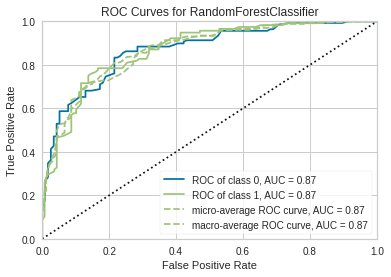

In [ ]:
plot_model(rf)

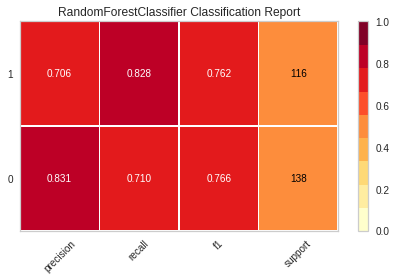

In [ ]:
plot_model(rf, plot = 'class_report',scale=1)

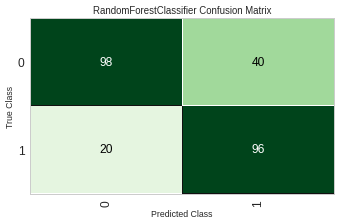

In [ ]:
plot_model(rf, plot = 'confusion_matrix',scale=0.8)